In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno 

from collections import Counter
from sklearn.preprocessing import StandardScaler,MinMaxScaler

pd.set_option('max_columns',135)
pd.set_option('max_rows',200)
sns.set(color_codes=True)


In [2]:
training_data = pd.read_csv('D://.../train_avm.csv').iloc[:,1:] #(37687,135)
testing_data = pd.read_csv('D://.../test_avm.csv').iloc[:,1:]
# training_data_impute = pd.read_csv('D://.../train_avm_impute.csv').iloc[:,1:] #(37687,135)
# testing_data_impute = pd.read_csv('D://.../test_avm_impute.csv').iloc[:,1:]


In [3]:
print(training_data.shape)
training_data.head()

(37687, 134)


,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_Rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_date,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,I_10,I_50,I_100,I_250,I_500,I_1000,I_MIN,II_10,II_50,II_100,II_250,II_500,II_1000,II_MIN,III_10,III_50,III_100,III_250,III_500,III_1000,III_MIN,IV_10,IV_50,IV_100,IV_250,IV_500,IV_1000,IV_MIN,V_10,V_50,V_100,V_250,V_500,V_1000,V_MIN,VI_10,VI_50,VI_100,VI_250,VI_500,VI_1000,VI_MIN,VII_10,VII_50,VII_100,VII_250,VII_500,VII_1000,VII_MIN,VIII_10,VIII_50,VIII_100,VIII_250,VIII_500,VIII_1000,VIII_MIN,IX_10,IX_50,IX_100,IX_250,IX_500,IX_1000,IX_MIN,X_10,X_50,X_100,X_250,X_500,X_1000,X_MIN,XI_10,XI_50,XI_100,XI_250,XI_500,XI_1000,XI_MIN,XII_10,XII_50,XII_100,XII_250,XII_500,XII_1000,XII_MIN,XIII_10,XIII_50,XIII_100,XIII_250,XIII_500,XIII_1000,XIII_MIN,XIV_10,XIV_50,XIV_100,XIV_250,XIV_500,XIV_1000,XIV_MIN,total_price
0,8,7,19289,4,1,2,6028,2,NaN,NaN,1.0,21.426802,5.584279,180,-37.67,119.29,625.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1544,4,14,14,0,0,1,1,8,39,82.676961,0,0,0,5,18,132,110.761328,0,0,1,17,73,235,86.589412,0,0,4,10,28,44,62.428191,0,0,1,7,31,143,58.042563,0,1,1,2,6,10,29.607781,0,1,5,34,131,532,40.439890,0,2,7,47,139,399,32.523085,0,0,2,8,36,116,75.268914,0,0,0,5,18,67,108.270812,0,0,0,3,13,50,164.052330,0,1,12,49,186,736,35.796546,0,0,0,2,6,29,174.954657,0,0,2,27,78,212,54.462081,9.570885e+06
1,8,21,20385,24,0,2,18325,0,NaN,81138.889762,13.0,11.387227,13.563031,343,-39.13,117.09,950.0,139259.0,14.7523,9440.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,3350,4,11,13,0,0,0,0,0,9,590.458945,0,0,0,0,7,31,279.365544,0,1,1,3,5,50,45.508654,0,0,0,0,0,1,982.352700,0,0,0,0,2,14,423.658555,0,0,0,0,1,5,421.260244,0,0,0,10,31,101,157.922588,0,0,1,4,21,78,73.978254,0,1,1,3,12,33,47.969413,0,1,2,5,11,47,42.380415,0,0,0,0,3,40,283.620244,0,1,2,7,32,124,43.654182,0,0,0,0,0,0,1247.796459,0,0,1,2,20,125,99.628966,1.421501e+07
2,1,21,20657,2,4,2,6880,2,NaN,NaN,NaN,61.306524,4.688108,102,-39.24,117.19,536.0,112397.0,71.0400,1582.0,0.003948,0.047944,0.208219,0.102360,0.327584,0.166931,0.143015,7.37,7.72,5.74,2.39,63,1,4,9,0,0,0,0,0,1,603.643541,0,1,1,1,1,2,19.028439,0,0,0,0,0,1,546.047664,0,0,0,0,0,0,1435.928054,0,0,0,0,0,2,689.539284,0,0,0,0,0,0,2727.723917,0,0,0,0,0,3,669.730617,0,0,0,0,1,2,332.171857,0,0,0,0,0,0,1354.750025,0,0,0,0,0,0,1165.273099,0,0,0,0,0,1,607.948642,0,0,0,5,9,13,124.956094,0,0,0,0,0,0,1766.374491,0,0,0,2,18,47,124.131236,7.627120e+05
3,8,7,20474,15,0,2,16559,0,NaN,61488.568950,8.0,11.387227,7.726227,84,-37.69,119.27,716.0,238067.0,29.5578,8054.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,1591,0,12,14,0,0,0,1,1,21,213.091735,0,0,0,3,16,98,205.935244,0,0,1,2,15,139,87.008685,0,0,0,0,0,1,907.720034,0,0,0,2,10,99,118.176289,0,0,0,0,2,4,397.858990,0,0,0,8,29,250,105.563252,0,0,0,4,33,319,118.176289,0,0,1,1,5,68,87.364785,0,0,0,7,9,72,121.375810,0,0,0,4,17,65,134.376535,0,0,3,16,72,447,64.551199,0,0,0,0,0,9,516.835172,0,0,0,1,65,252,196.690224,8.510296e+06
4,8,7,19927,10,3,2,9863,0,NaN,61488.568950,2.0,11.387227,7.480303,180,-37.67,119.32,604.0,551480.0,23.1373,23835.0,0.003518,0.048779,0.216042,0.106792,0.310975,0.195193,0.118700,7.94,5.93,6.11,2.50,2122,4,13,14,0,0,0,3,10,38,124.443839,0,0,0,7,48,157,159.757485,0,1,2,9,31,201,36.215680,0,0,0,0,1,3,443.618507,0,0,0,6,20,153,144.214039,0,0,0,0,0,2,703.374874,0,1,3,24,96,464,17.805175,0,0,0,16,83,420,144.214039,0,0,0,5,16,120,120.091363,0,0,0,5,17,67,124.950692,1,1,3,7,19,64,6.465746,0,1,8,72,255,975,47.436622,0,0,0,2,3,23,207.218133,0,0,0,19,118,288,102.955013,1.181540e+07


## Missing Value Visualization

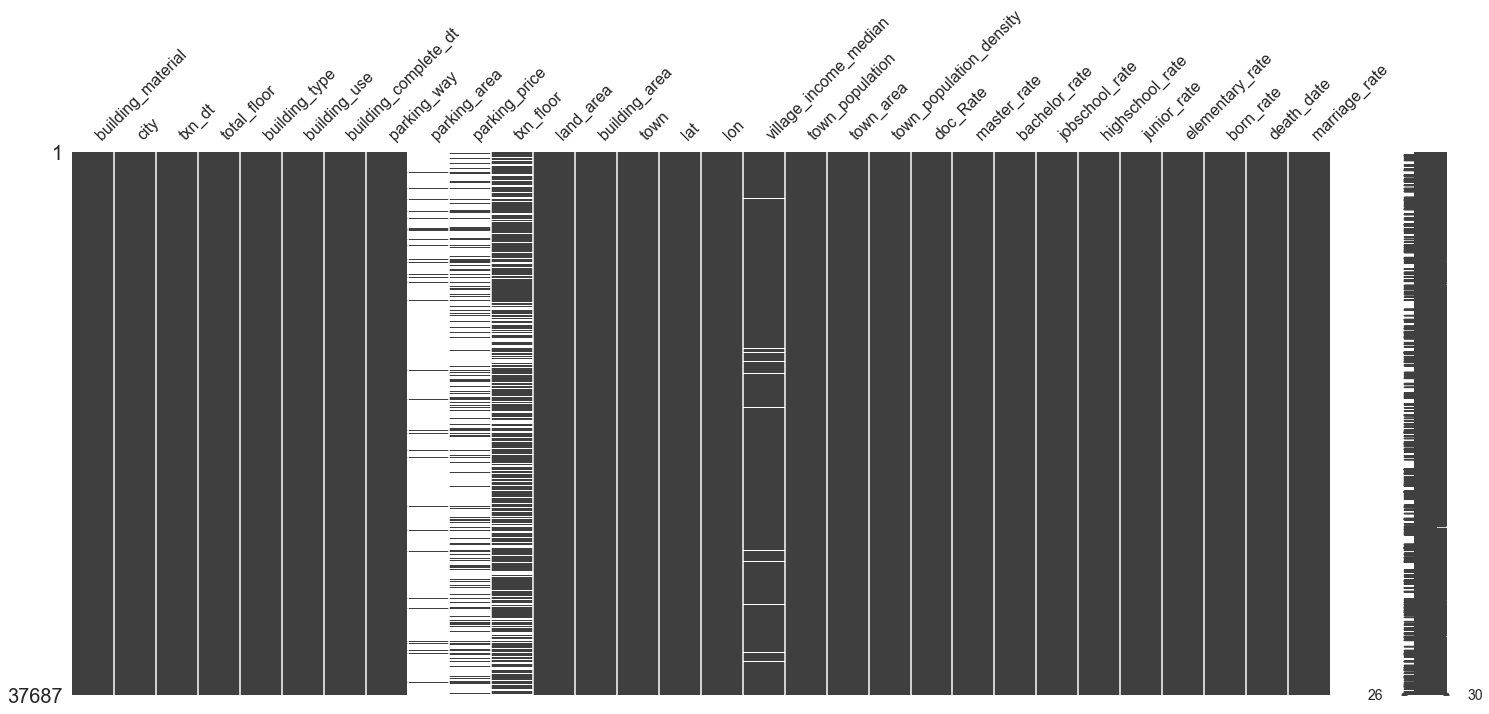

In [4]:
# training_data.isnull().sum()
msno.matrix(training_data.iloc[:,0:30]) 


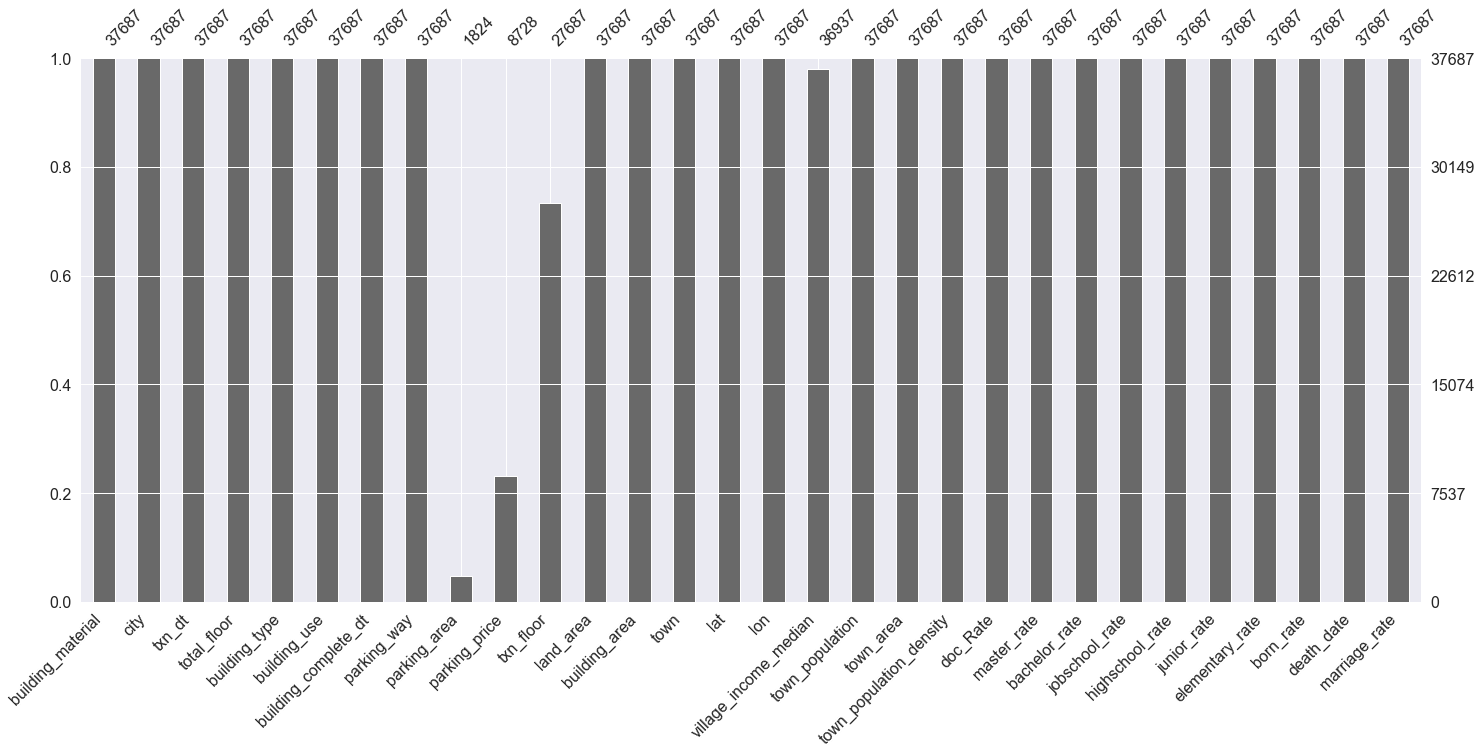

In [5]:
msno.bar(training_data.iloc[:,0:30])

In [6]:
training_data.iloc[:,0:32].nunique()

building_material             9
city                         11
txn_dt                      999
total_floor                  29
building_type                 5
building_use                 10
building_complete_dt        636
parking_way                   3
parking_area                 55
parking_price                92
txn_floor                    28
land_area                   283
building_area               322
town                        210
lat                         184
lon                         226
village_income_median       481
town_population             216
town_area                   216
town_population_density     210
doc_Rate                     11
master_rate                  11
bachelor_rate                11
jobschool_rate               11
highschool_rate              11
junior_rate                  11
elementary_rate              11
born_rate                    11
death_date                   11
marriage_rate                11
divorce_rate                 11
village 

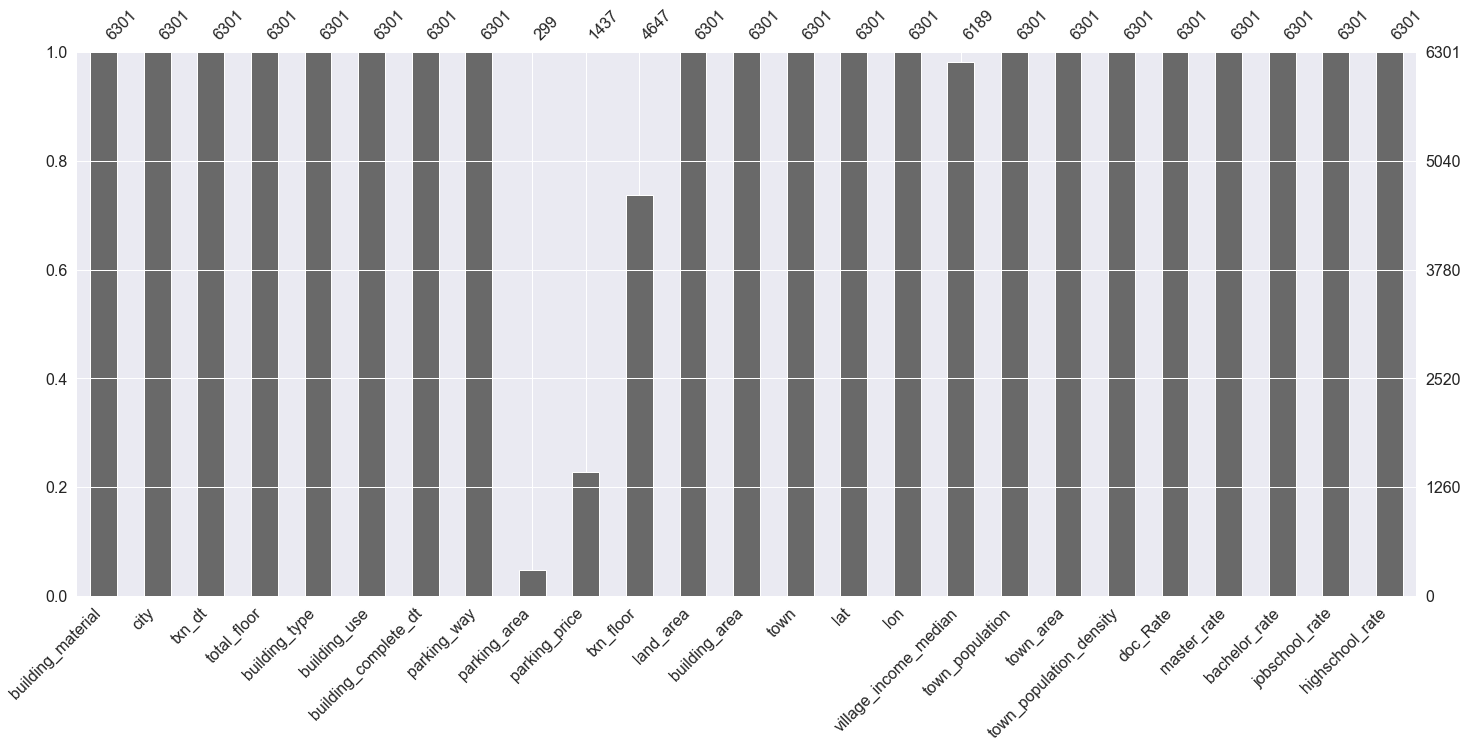

In [7]:
# testing_data.isnull().sum()
msno.bar(testing_data.iloc[:,0:25])

In [8]:
training_data.describe()

,building_material,city,txn_dt,total_floor,building_type,building_use,building_complete_dt,parking_way,parking_area,parking_price,txn_floor,land_area,building_area,town,lat,lon,village_income_median,town_population,town_area,town_population_density,doc_Rate,master_rate,bachelor_rate,jobschool_rate,highschool_rate,junior_rate,elementary_rate,born_rate,death_date,marriage_rate,divorce_rate,village,N_50,N_500,N_1000,I_10,I_50,I_100,I_250,I_500,I_1000,I_MIN,II_10,II_50,II_100,II_250,II_500,II_1000,II_MIN,III_10,III_50,III_100,III_250,III_500,III_1000,III_MIN,IV_10,IV_50,IV_100,IV_250,IV_500,IV_1000,IV_MIN,V_10,V_50,V_100,V_250,V_500,V_1000,V_MIN,VI_10,VI_50,VI_100,VI_250,VI_500,VI_1000,VI_MIN,VII_10,VII_50,VII_100,VII_250,VII_500,VII_1000,VII_MIN,VIII_10,VIII_50,VIII_100,VIII_250,VIII_500,VIII_1000,VIII_MIN,IX_10,IX_50,IX_100,IX_250,IX_500,IX_1000,IX_MIN,X_10,X_50,X_100,X_250,X_500,X_1000,X_MIN,XI_10,XI_50,XI_100,XI_250,XI_500,XI_1000,XI_MIN,XII_10,XII_50,XII_100,XII_250,XII_500,XII_1000,XII_MIN,XIII_10,XIII_50,XIII_100,XIII_250,XIII_500,XIII_1000,XIII_MIN,XIV_10,XIV_50,XIV_100,XIV_250,XIV_500,XIV_1000,XIV_MIN,total_price
count,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,1824.000000,8728.000000,27687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,36937.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.00000,37687.000000,37687.00000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.00000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.00000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,37687.000000,3.768700e+04
mean,7.254677,11.405551,19964.085281,7.534163,1.937352,2.329026,10986.422533,1.586648,7.757889,51870.789743,5.289522,27.949948,10.067265,140.194417,-38.023118,118.649718,673.218507,231279.029108,37.128081,11421.630217,0.005069,0.057243,0.228075,0.105753,0.307039,0.171434,0.125388,8.345517,6.672424,6.001839,2.348138,1652.124844,3.007191,12.237748,13.358744,0.004007,0.069626,0.281742,1.553215,5.531510,19.114814,236.322105,0.032345,0.33083,1.199061,6.65041,23.298511,76.119484,170.521473,0.048001,0.480006,1.851222,10.607079,37.769231,128.040836,155.834342,0.003423,0.033699,0.120572,0.649985,2.235492,7.823440,730.663227,0.039138,0.324117,1.218139,6.761244,23.957970,82.956404,155.075969,0.001141,0.016637,0.064744,0.370446,1.348555,4.755274,550.022637,0.116565,1.106190,4.198424,23.554674,84.217608,292.927933,87.478774,0.119272,1.10359,4.058853,21.767612,75.841404,255.807414,98.978845,0.024252,0.294399,1.137660,6.402128,22.635365,77.705575,212.006779,0.008385,0.129700,0.559238,3.462573,13.05145,46.684639,216.773695,0.006076,0.142171,0.596572,3.684109,13.637488,48.407992,259.664243,0.258657,1.957333,6.477990,32.50

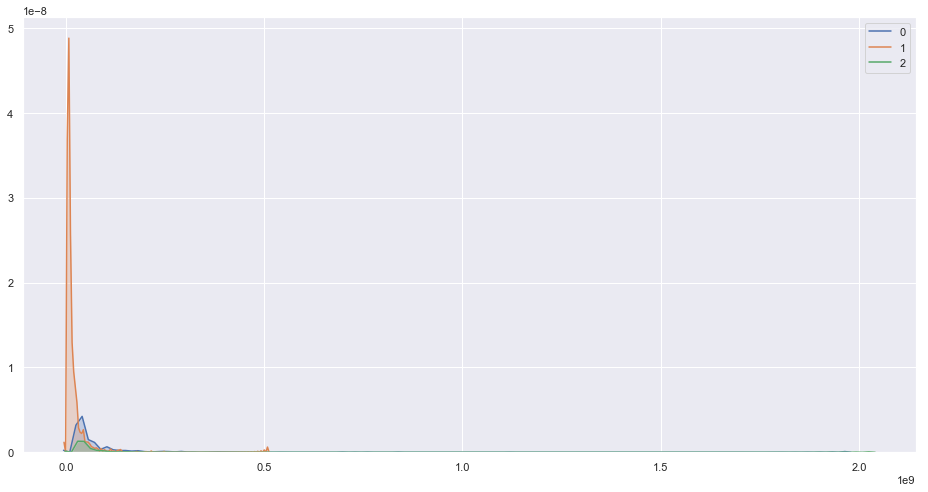

In [9]:
plt.figure(figsize=(16,8))
for i in range(3):
#     plt.subplot(1,3,i+1)
    sns.kdeplot(training_data[training_data.parking_way==i].total_price,shade=True,label='%s'%(i))
# sns.distplot(training_data[training_data.parking_way==i].total_price)


In [10]:
# parking_area為缺失值大部分是parking_way=2
df = training_data[training_data.parking_area.isnull()]
for i in range(3):
    print(f'{i}: {df[df.parking_way==i].shape[0]}')


0: 5355
1: 1549
2: 28959


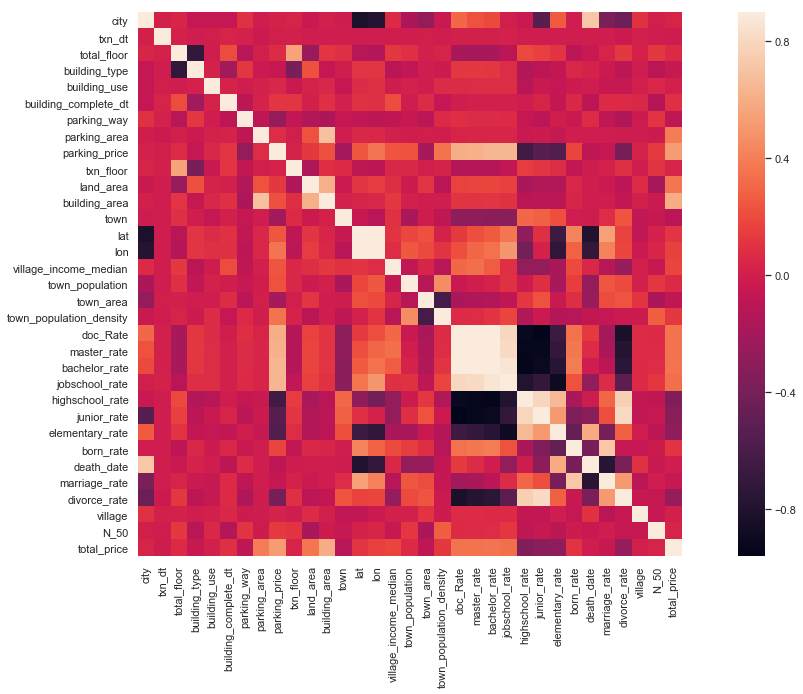

In [11]:
plt.figure(figsize=(20,10))
df = training_data.copy()
df=df.dropna(subset=['parking_price'])
df = df.iloc[:,1:33]
df['total_price'] = training_data['total_price']
corrmat = df.corr()
sns.heatmap(corrmat, vmax=0.9, square=True)
# sns.heatmap(corrmat, vmax=0.9, square=True,cmap='YlGn')

In [12]:
corrmat.sort_values(["total_price"], ascending = False, inplace = True)
print(corrmat.total_price)

total_price                1.000000
building_area              0.601753
parking_price              0.526147
parking_area               0.397393
land_area                  0.366755
bachelor_rate              0.362107
master_rate                0.354772
doc_Rate                   0.350148
jobschool_rate             0.335734
village_income_median      0.177551
lon                        0.163387
town_population_density    0.129623
lat                        0.114976
born_rate                  0.103209
building_complete_dt       0.093222
town_population            0.060014
total_floor                0.058195
city                       0.034745
txn_floor                  0.033074
N_50                       0.029806
building_use               0.013456
village                    0.010037
death_date                -0.012405
txn_dt                    -0.018447
building_type             -0.044479
marriage_rate             -0.050084
parking_way               -0.080712
town_area                 -0

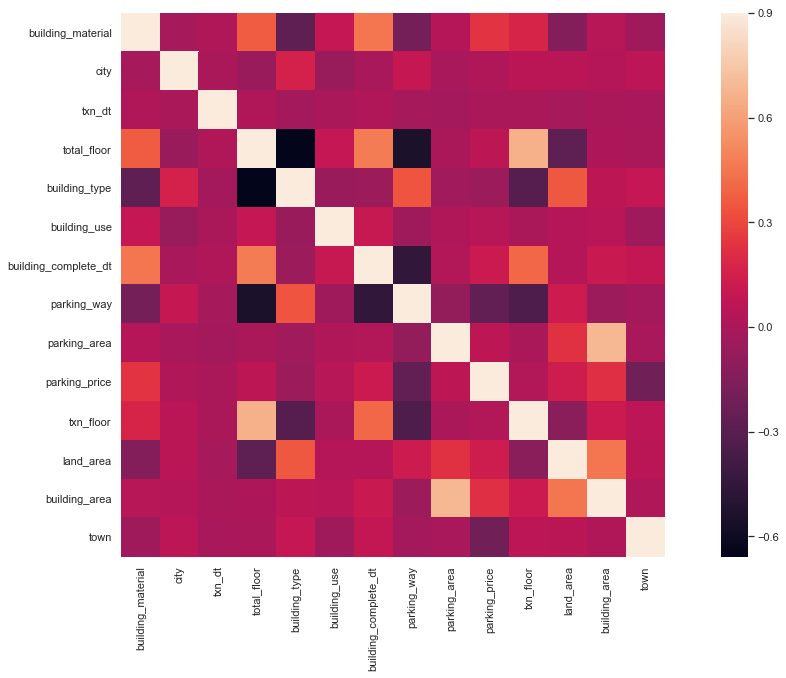

In [13]:
plt.figure(figsize=(20,10))
df = training_data.copy()
df = df.iloc[:,0:14]
corrmat = df.corr()
sns.heatmap(corrmat, vmax=0.9, square=True)

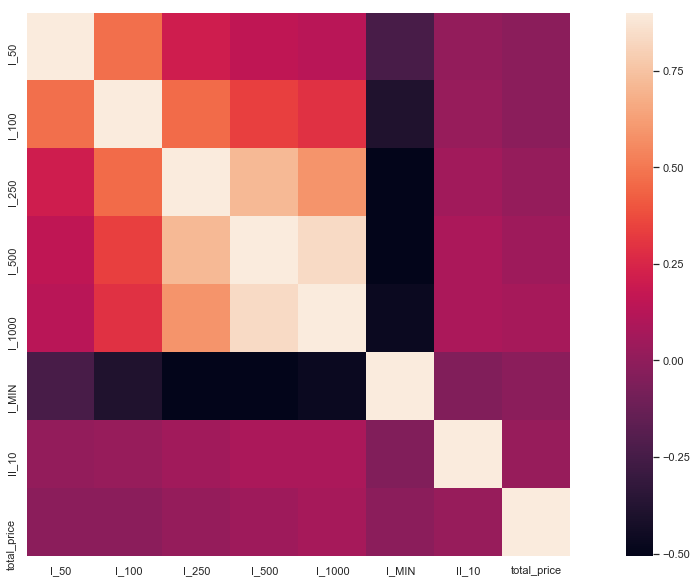

In [14]:
plt.figure(figsize=(20,10))
df = training_data.copy()
df = df.iloc[:,36:43]
df['total_price'] = training_data['total_price']
# print(training_data.shape)
corrmat = df.corr()
# plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Preprocessing

In [15]:
total_price_statistic = training_data.total_price.describe()
IQR = total_price_statistic['75%']-total_price_statistic['25%']
lb = total_price_statistic['25%']-1.5*IQR
ub = total_price_statistic['75%']+1.5*IQR

In [16]:
rmoutlier_df = training_data[(training_data.total_price>lb) & (training_data.total_price<ub)]
print(rmoutlier_df.shape)

outlier_df = training_data[(training_data.total_price<lb) | (training_data.total_price>ub)]
print(outlier_df.shape)

(33934, 134)
(3753, 134)


In [17]:
# outlier description -> 許多極大的離群值
df = training_data[training_data.total_price<lb]
print(df.shape)

df = training_data[training_data.total_price>ub]
print(df.shape)

(0, 134)
(3753, 134)


In [18]:
# total_price裝箱
total_price_ordinal = [total_price_statistic['min'],total_price_statistic['25%'],total_price_statistic['50%'],total_price_statistic['75%'],total_price_statistic['max']]
total_price_ls = training_data.total_price.tolist()

#
temp_ls=[]

for j in range(len(total_price_ls)):
    i = 0
    interval = total_price_ordinal[0]
    while(total_price_ls[j]>interval):
        i +=1
        interval = total_price_ordinal[i]
 
    if i==0:i=1
    temp_ls.append(i-1)
#
training_data['total_price_level'] = temp_ls

In [19]:
vim_null_df = training_data[training_data.village_income_median.isnull()]
txn_floor_df = training_data.dropna(subset=['txn_floor'],axis=0)

## Plotting

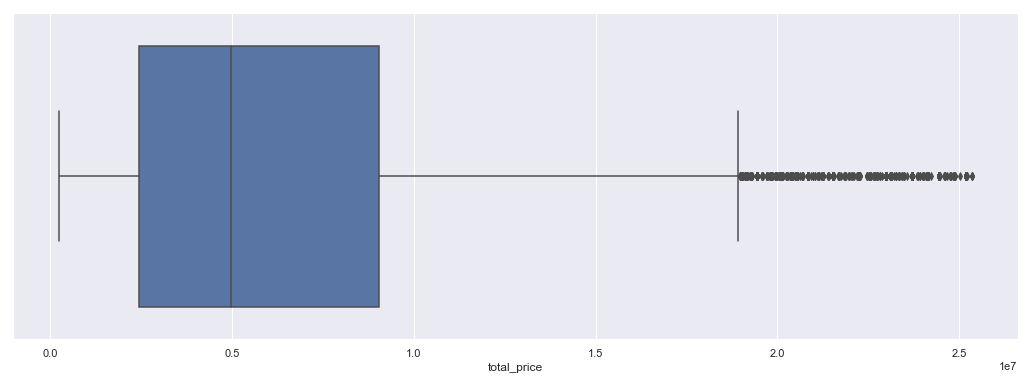

In [20]:
plt.figure(figsize=(18,6))
ax = sns.boxplot(x=rmoutlier_df['total_price'])

In [21]:
print(training_data.total_price.skew())
print(training_data.total_price.kurt())

print(rmoutlier_df.total_price.skew())
print(rmoutlier_df.total_price.kurt())

24.841363128417267
945.3073037607885
1.3151293887020379
1.2031806292577198


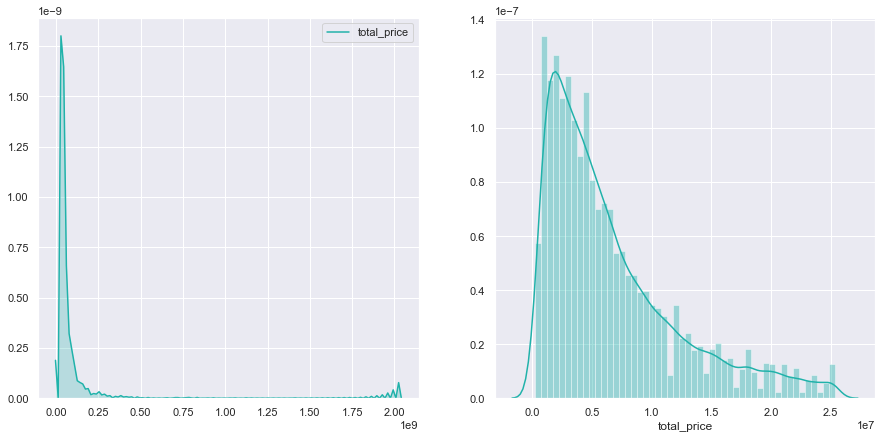

In [22]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.kdeplot(training_data.total_price,shade=True,label='total_price',color='lightseagreen')
plt.subplot(1,2,2)
# sns.kdeplot(rmoutlier_df.total_price,shade=True,label='total_price')
sns.distplot(rmoutlier_df.total_price,label='total_price',color='lightseagreen')


D:\Programming\Python\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
D:\Programming\Python\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


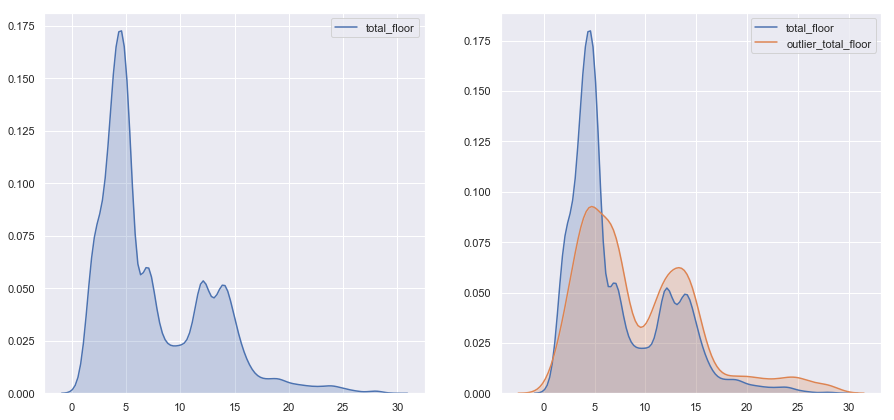

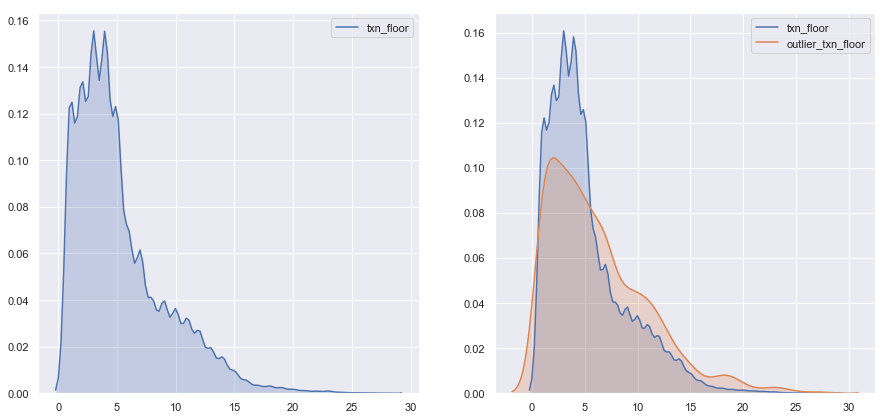

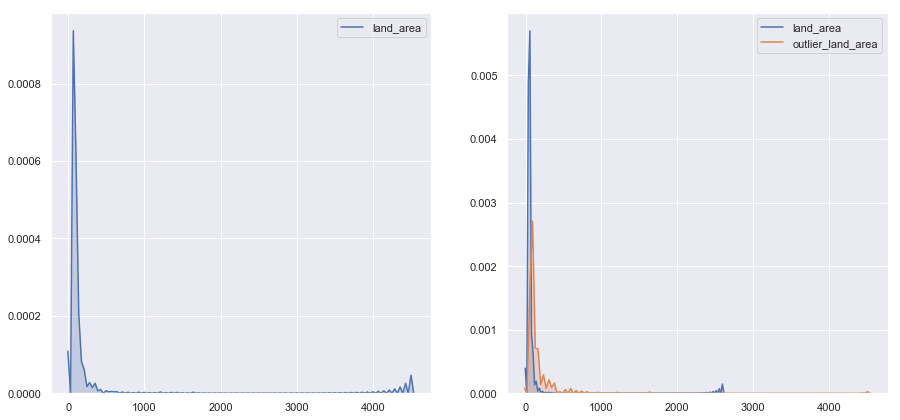

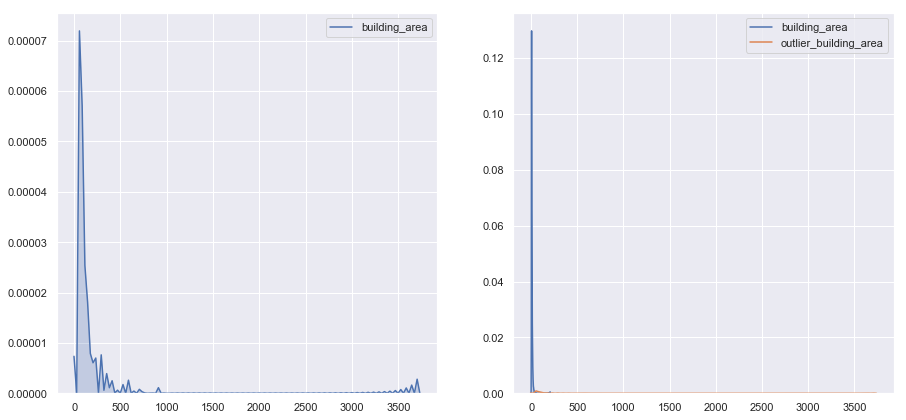

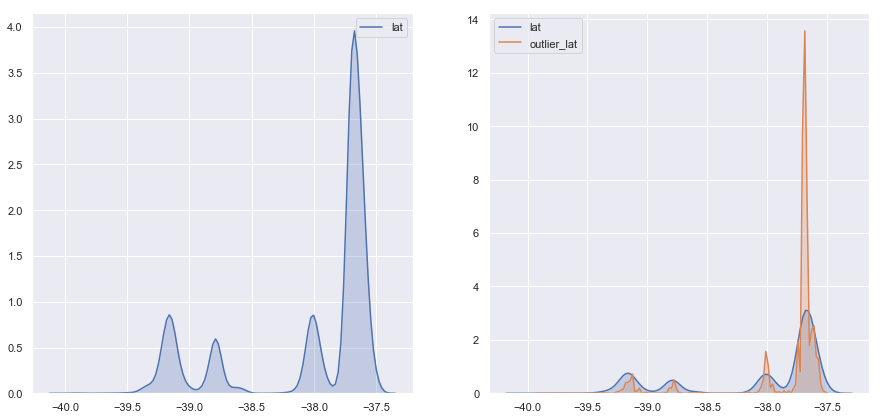

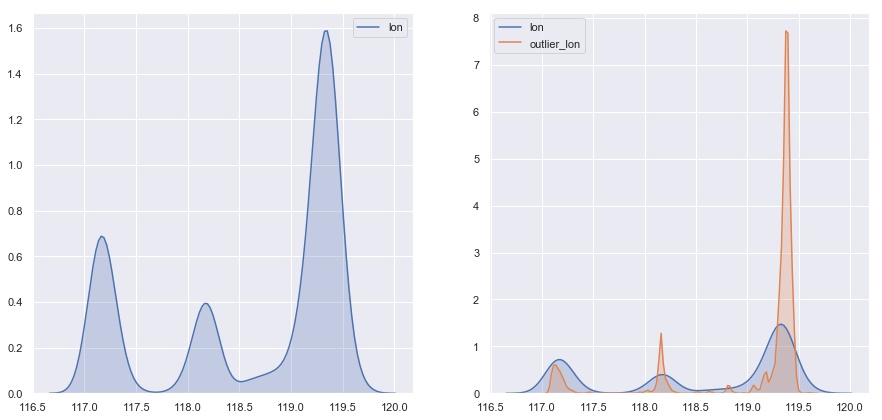

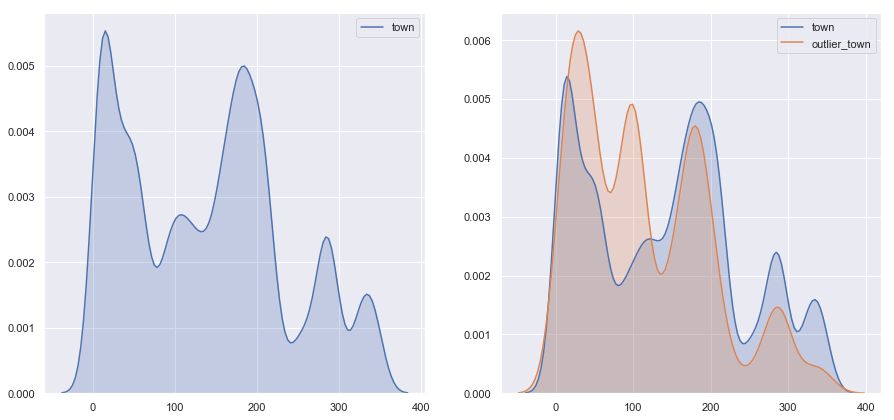

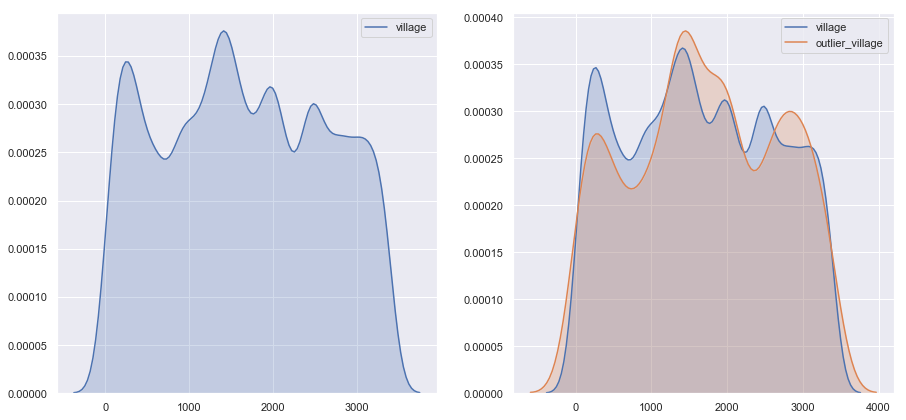

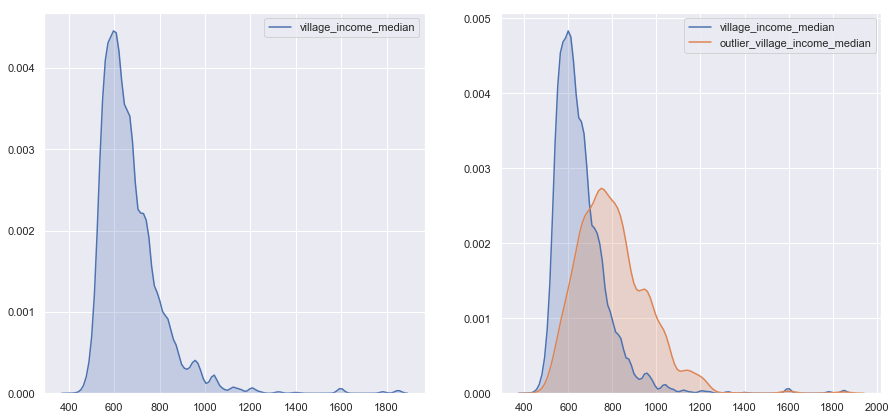

In [23]:
for var in['total_floor','txn_floor','land_area','building_area','lat','lon','town','village','village_income_median']:
    plt.figure(figsize=(15,7))

    plt.subplot(1,2,1)
    sns.kdeplot(training_data['%s'%var],shade=True,label='%s'%var)
    plt.subplot(1,2,2)
    sns.kdeplot(rmoutlier_df['%s'%var],shade=True,label='%s'%var)
    sns.kdeplot(outlier_df['%s'%var],shade=True,label='outlier_%s'%var)


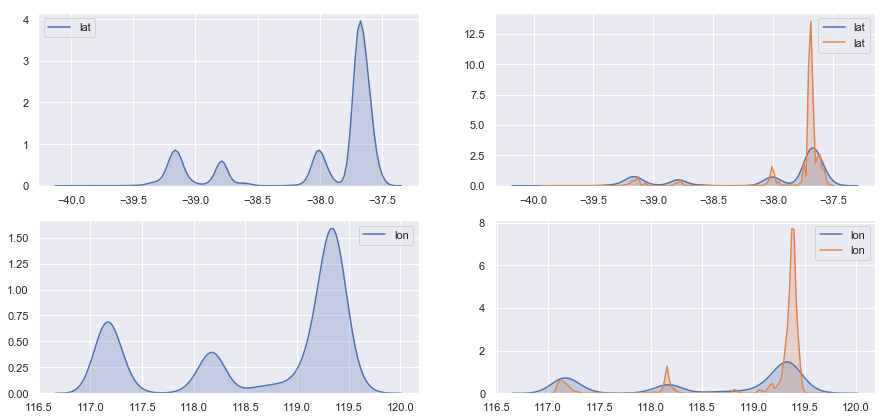

In [24]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.kdeplot(training_data.lat,shade=True,label='lat')
plt.subplot(2,2,2)
sns.kdeplot(rmoutlier_df.lat,shade=True,label='lat')
sns.kdeplot(outlier_df.lat,shade=True,label='lat')

plt.subplot(2,2,3)
sns.kdeplot(training_data.lon,shade=True,label='lon')
plt.subplot(2,2,4)
sns.kdeplot(rmoutlier_df.lon,shade=True,label='lon')
sns.kdeplot(outlier_df.lon,shade=True,label='lon')

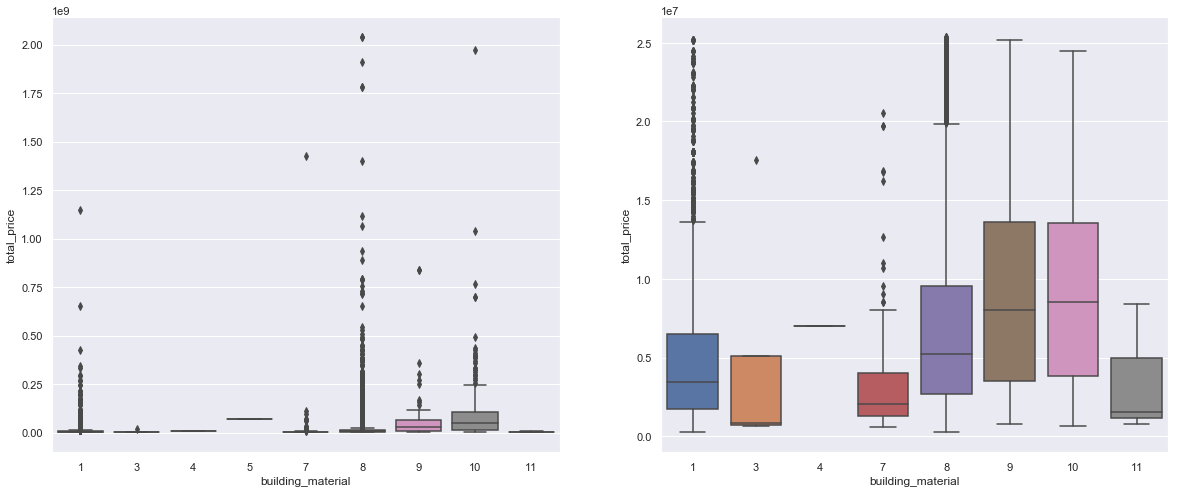

In [25]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
var = 'building_material'
data = pd.concat([training_data_impute['total_price'], training_data_impute[var]], axis=1)
fig = sns.boxplot(x=var, y='total_price', data=data)
plt.subplot(1,2,2)
var = 'building_material'
data = pd.concat([rmoutlier_df['total_price'], rmoutlier_df[var]], axis=1)
fig = sns.boxplot(x=var, y='total_price', data=data)

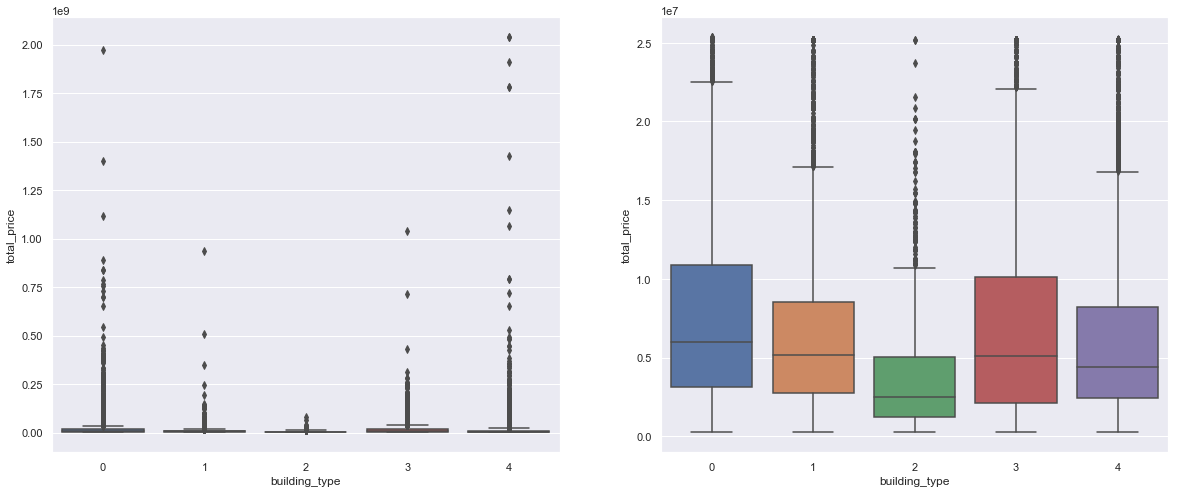

In [26]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
var = 'building_type'
data = pd.concat([training_data_impute['total_price'], training_data_impute[var]], axis=1)
fig = sns.boxplot(x=var, y='total_price', data=data)
plt.subplot(1,2,2)
var = 'building_type'
data = pd.concat([rmoutlier_df['total_price'], rmoutlier_df[var]], axis=1)
fig = sns.boxplot(x=var, y='total_price', data=data)

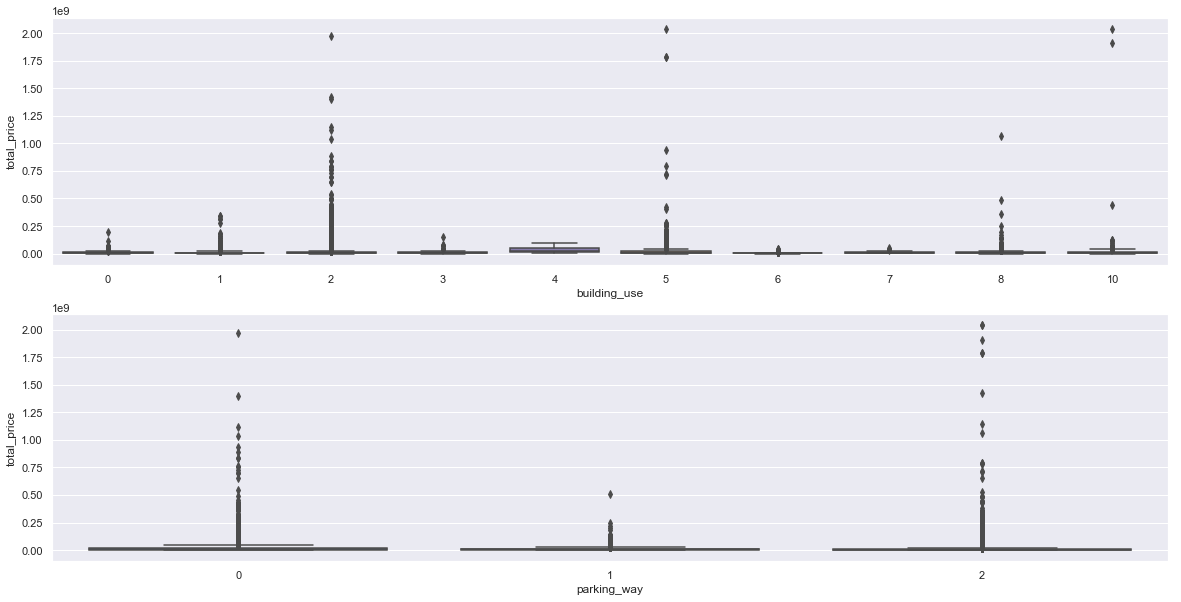

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
var = 'building_use'
data = pd.concat([training_data['total_price'], training_data[var]], axis=1)
fig = sns.boxplot(x=var, y='total_price', data=data)
plt.subplot(2,1,2)
var = 'parking_way'
data = pd.concat([training_data['total_price'], training_data[var]], axis=1)
fig = sns.boxplot(x=var, y='total_price', data=data)

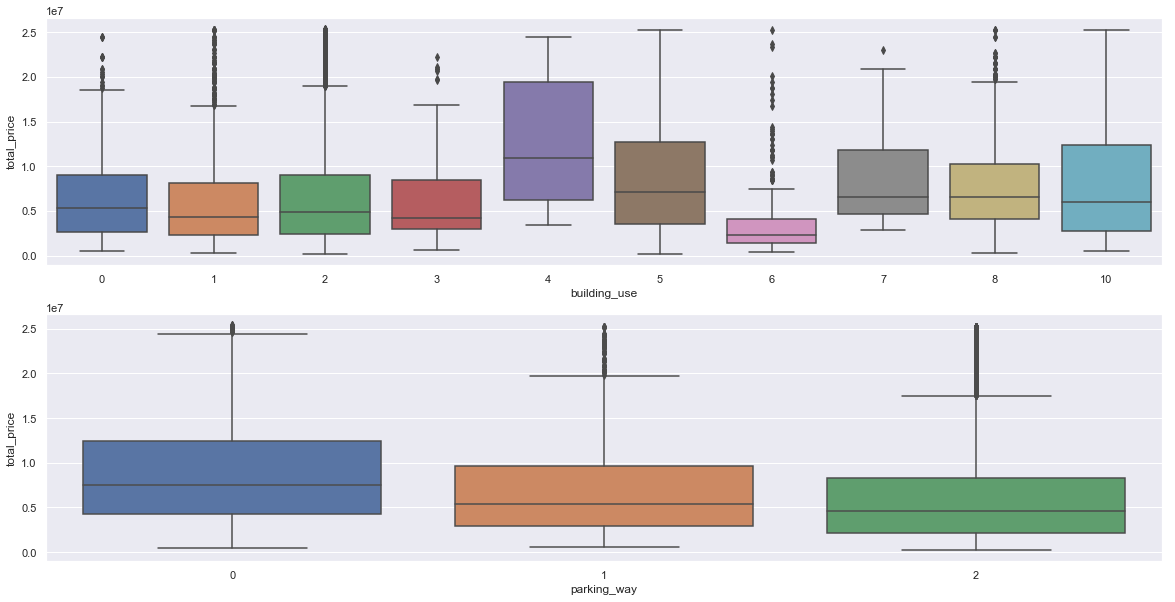

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
var = 'building_use'
data = pd.concat([rmoutlier_df['total_price'], rmoutlier_df[var]], axis=1)
fig = sns.boxplot(x=var, y='total_price', data=data)
plt.subplot(2,1,2)
var = 'parking_way'
data = pd.concat([rmoutlier_df['total_price'], rmoutlier_df[var]], axis=1)
fig = sns.boxplot(x=var, y='total_price', data=data)

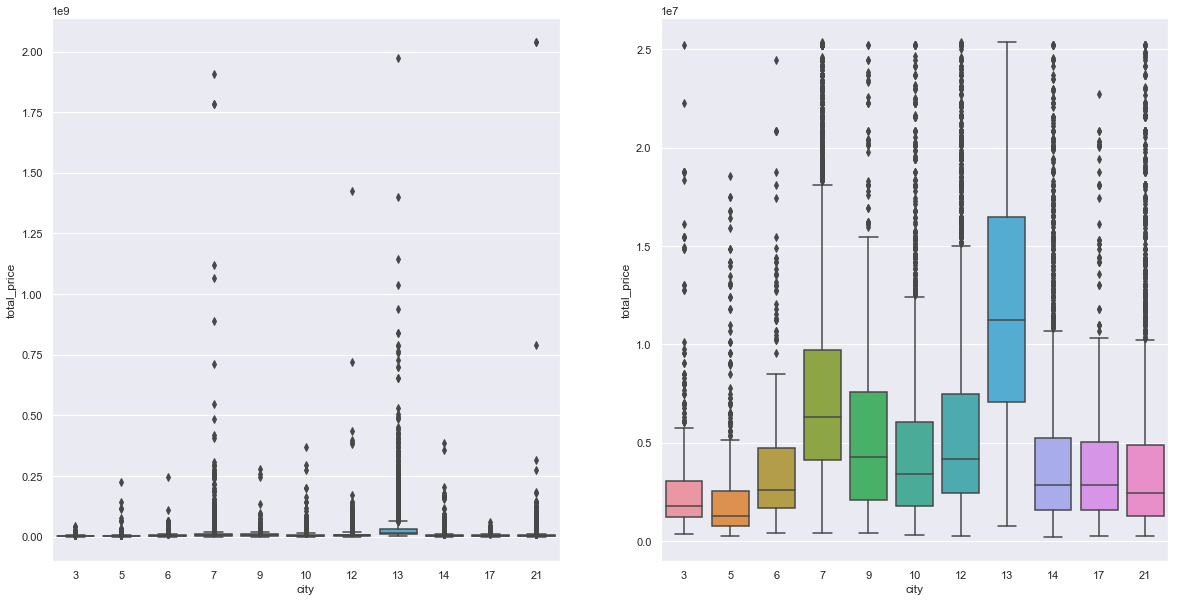

In [29]:
plt.figure(figsize=(20,10))

var = 'city'
plt.subplot(1,2,1)
data = pd.concat([training_data['total_price'], training_data[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='total_price', data=data)

plt.subplot(1,2,2)
data = pd.concat([rmoutlier_df['total_price'], rmoutlier_df[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='total_price', data=data)



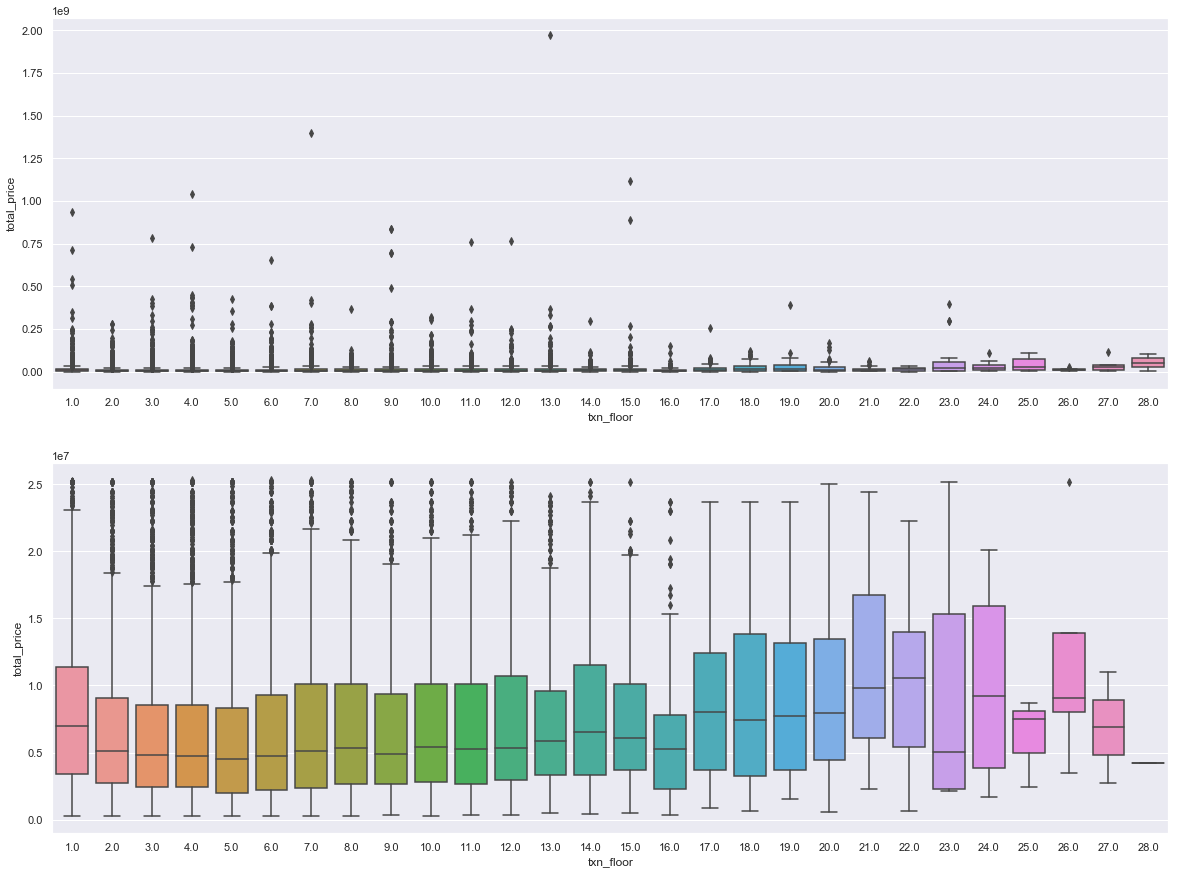

In [30]:
plt.figure(figsize=(20,15))

plt.subplot(2,1,1)
var = 'txn_floor'
data = pd.concat([training_data['total_price'], training_data[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='total_price', data=data)

plt.subplot(2,1,2)
var = 'txn_floor'
data = pd.concat([rmoutlier_df['total_price'], rmoutlier_df[var]], axis=1)
# f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y='total_price', data=data)
# fig.axis(ymin=0, ymax=800000);

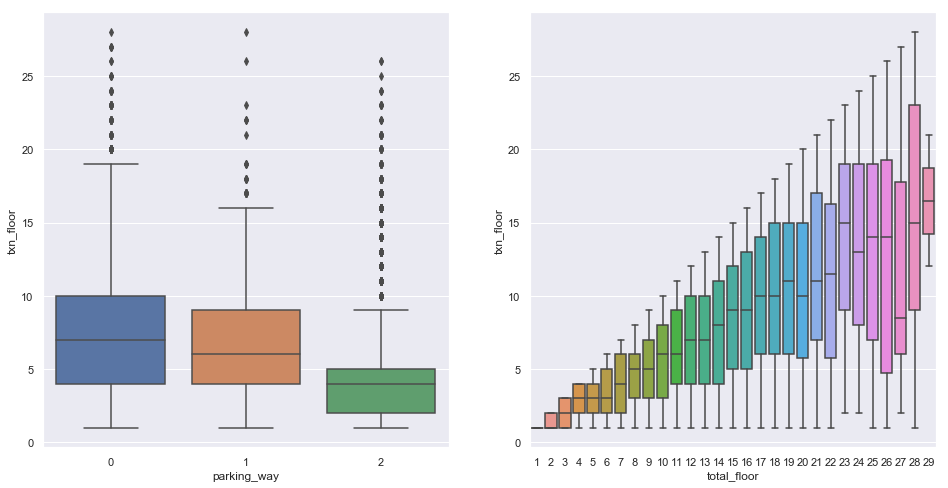

In [31]:
plt.figure(figsize=(16,8))
# ax = sns.scatterplot(x="village", y="txn_floor",data=txn_floor_df,palette="Paired")
plt.subplot(1,2,1)
fig = sns.boxplot(x='parking_way', y='txn_floor', data=txn_floor_df)
plt.subplot(1,2,2)
fig = sns.boxplot(x='total_floor', y='txn_floor', data=txn_floor_df)


In [32]:
plt.figure(figsize=(20,10))
df = txn_floor_df.copy()
df = df.iloc[:,0:33]
corrmat = df.corr()
# sns.heatmap(corrmat, vmax=0.9, square=True)
corrmat['txn_floor'].sort_values(ascending=False)

txn_floor                  1.000000
total_floor                0.666934
building_complete_dt       0.406697
building_material          0.172594
highschool_rate            0.144874
village_income_median      0.135187
building_area              0.119027
N_50                       0.117772
elementary_rate            0.096959
junior_rate                0.090784
divorce_rate               0.079515
town                       0.064867
city                       0.056487
town_area                  0.041937
marriage_rate              0.038406
parking_price              0.024439
parking_area               0.004770
death_date                 0.004372
txn_dt                    -0.001522
building_use              -0.003626
village                   -0.011040
born_rate                 -0.029819
town_population           -0.039983
town_population_density   -0.063869
lat                       -0.094968
jobschool_rate            -0.109129
doc_Rate                  -0.115830
land_area                 -0

<Figure size 1440x720 with 0 Axes>

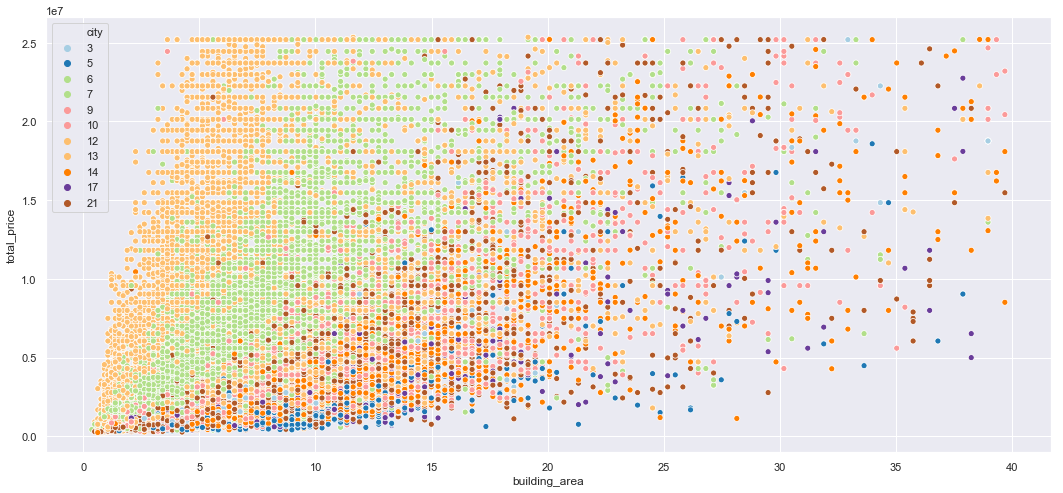

In [91]:
plt.figure(figsize=(18,8))
ax = sns.scatterplot(x="building_area", y="total_price",hue='city',data=rmoutlier_df[rmoutlier_df.building_area<40],palette="Paired",legend='full')

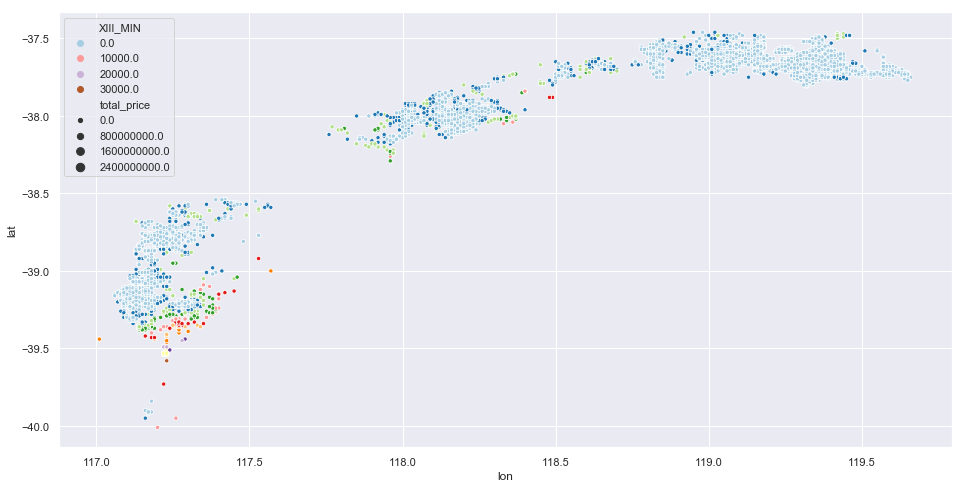

In [104]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="lon", y="lat",hue='XIII_MIN',size='total_price',data=training_data,palette="Paired")

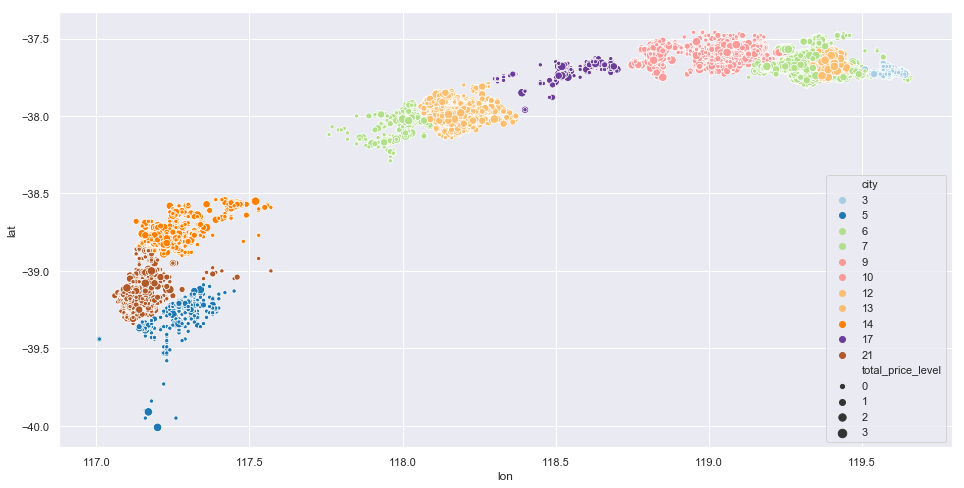

In [36]:
plt.figure(figsize=(16,8))
ax = sns.scatterplot(x="lon", y="lat",hue='city',size='total_price_level',data=training_data,palette="Paired",legend='full')